# Lab 01
CSC 466
Fall 2023

Martin Hsu (mshsu@calpoly.edu)
Lana Huynh (lmhuynh@calpoly.edu)

Purpose: To clean, extract, analyze and visualize baby names data to answer the following queries in the questions section.

## Questions

1. **Game of Thrones** - Which Game of Thrones names were most popular in each year of the TV show's running, and did that relate to a specific episode?
2. **Funny spellings of Ashley** - Which spellings of Ashley were most preferred in each state during the period spanning 2010-2014?
3. **Gender swap names** - Over time, which names changed the most from male to female and (vice versa), 1900-2000?

## Setup

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
natl_names = pd.read_csv("http://www.csc.calpoly.edu/~dekhtyar/466-Fall2023/data/NationalNames.csv")
natl_names

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


In [3]:
state_names = pd.read_csv("http://www.csc.calpoly.edu/~dekhtyar/466-Fall2023/data/StateNames.csv")
state_names

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7
...,...,...,...,...,...,...
5647421,5647422,Seth,2014,M,WY,5
5647422,5647423,Spencer,2014,M,WY,5
5647423,5647424,Tyce,2014,M,WY,5
5647424,5647425,Victor,2014,M,WY,5


## Question 1

### Extract Data

In [139]:
got_names = ['Arya', 'Bran', 'Brienne', 'Daenerys', 'Sandor', 'Talisa', 'Theon', 'Tyrion', 'Tyrell', 'Tywin']
df_got = natl_names[(natl_names['Name'].isin(got_names)) & (natl_names['Year'] >= 2010)][['Name', 'Year', 'Count']].groupby([ 'Year', 'Name']).sum().unstack()['Count']
df_got

Name,Arya,Bran,Brienne,Daenerys,Sandor,Talisa,Theon,Tyrell,Tyrion,Tywin
Year,,,,,,,,,,
2010,360.0,5.0,20.0,NaN,8.0,16.0,NaN,276.0,11.0,NaN
2011,498.0,7.0,14.0,NaN,5.0,13.0,NaN,226.0,18.0,NaN
2012,835.0,10.0,18.0,21.0,7.0,13.0,12.0,214.0,20.0,NaN
2013,1214.0,12.0,8.0,68.0,10.0,12.0,15.0,204.0,43.0,NaN
2014,1626.0,7.0,18.0,86.0,5.0,20.0,11.0,201.0,60.0,5.0


### Computations

In [140]:
df_got.idxmax()

Name
Arya        2014
Bran        2013
Brienne     2010
Daenerys    2014
Sandor      2013
Talisa      2014
Theon       2013
Tyrell      2010
Tyrion      2014
Tywin       2014
dtype: int64

### Visualize

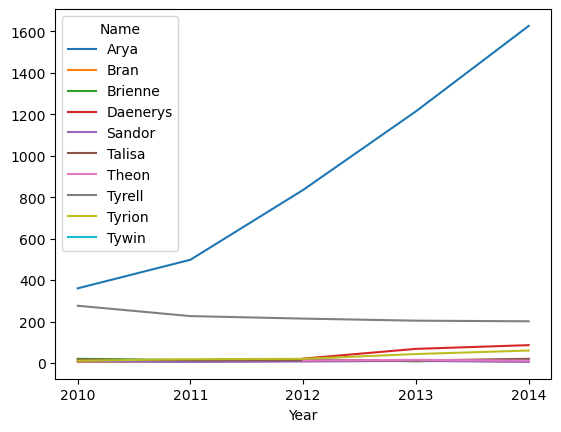

In [145]:
df_got.plot.line()
plt.xticks(range(2010, 2015))
plt.show()

### Analysis

## Question 2

### Extract Data

In [104]:
variations = ['Ashley', 'Ashlee', 'Ashlei', 'Ashleigh', 'Ashli', 'Ashlie', 'Ashllee',
              'Ashllei', 'Ashlley', 'Ashlli', 'Ashllie', 'Ashlly', 'Ashly']

df_ashley = state_names[(state_names['Name'].isin(variations)) & (state_names['Year'] >= 2010) & (state_names['Year'] <= 2014)][['Name','State', 'Count']].groupby(['State', 'Name']).sum().reset_index()
df_ashley

,State,Name,Count
0,AK,Ashley,39
1,AL,Ashlee,5
2,AL,Ashleigh,5
3,AL,Ashley,207
4,AR,Ashleigh,5
...,...,...,...
120,WI,Ashlee,10
121,WI,Ashleigh,5
122,WI,Ashley,259
123,WV,Ashley,44


### Computations

In [107]:
df_ashley_most = df_ashley.groupby('State').max().reset_index()[['State', 'Name']].rename(columns={"State": "STUSPS"})
df_ashley_most

,STUSPS,Name
0,AK,Ashley
1,AL,Ashley
2,AR,Ashley
3,AZ,Ashly
4,CA,Ashly
5,CO,Ashly
6,CT,Ashley
7,DC,Ashly
8,DE,Ashley
9,FL,Ashly


In [113]:
zipfile = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip"
df_state = gpd.read_file(zipfile)
df_state = df_state.merge(df_ashley_most, how = "left", on="STUSPS")
df_state

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Name
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",Ashley
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",Ashly
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",Ashley
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",Ashly
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",Ashley
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",Ashly
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",Ashley
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",Ashly
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",Ashley
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",Ashly


### Visualize

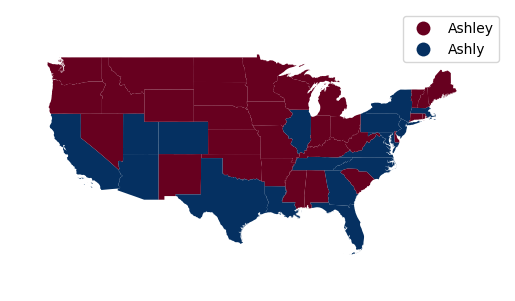

In [143]:
df_state.plot(column="Name", cmap="RdBu", legend=True)
plt.xlim((-130, -60))
plt.ylim((20,55))
plt.axis('off')
plt.show()

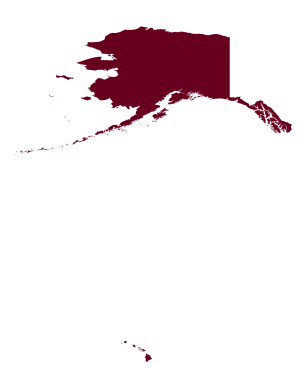

In [144]:
df_state.plot(column="Name", cmap="RdBu", legend=False)
plt.xlim((-180, -130))
plt.axis('off')
plt.show()

### Analysis

## Question 3

### Extract Data

In [15]:
f_names = natl_names[(natl_names['Year'] >= 1900) & (natl_names['Year'] <= 2000) & (natl_names['Gender'] == 'F')]
m_names = natl_names[(natl_names['Year'] >= 1900) & (natl_names['Year'] <= 2000) & (natl_names['Gender'] == 'M')]
names = f_names.merge(m_names, how="inner", on = ["Name", "Year"])
names = names[['Name', 'Year', 'Count_x', 'Count_y']].rename(columns={"Count_x": "Count_F",
                                                                      "Count_y": "Count_M"})
names['Prop_F'] = names['Count_F'] / (names['Count_F'] + names['Count_M'])
names['Prop_M'] = 1 - names['Prop_F']
names

,Name,Year,Count_F,Count_M,Prop_F,Prop_M
0,Mary,1900,16707,75,0.995531,0.004469
1,Helen,1900,6343,18,0.997170,0.002830
2,Anna,1900,6114,25,0.995928,0.004072
3,Margaret,1900,5306,16,0.996994,0.003006
4,Ruth,1900,4765,16,0.996653,0.003347
...,...,...,...,...,...,...
122722,Walker,2000,5,578,0.008576,0.991424
122723,Weslee,2000,5,20,0.200000,0.800000
122724,Wilson,2000,5,421,0.011737,0.988263
122725,Wylee,2000,5,6,0.454545,0.545455


### Computations

In [48]:
names_prop = names[['Name', 'Year', 'Prop_F']]
names_prop = names_prop.set_index(['Name', 'Year']).unstack()['Prop_F']
names_prop['diff'] = (names_prop[2000] + names_prop[1999] + names_prop[1998] + names_prop[1997] + names_prop[1996]) / 5 \
                   - (names_prop[1900] + names_prop[1901] + names_prop[1902] + names_prop[1903] + names_prop[1904]) / 5
names_prop = names_prop.sort_values('diff').dropna(subset = 'diff')
names_prop

Year,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1992,1993,1994,1995,1996,1997,1998,1999,2000,diff
Name,,,,,,,,,,,,,,,,,,,,,
Jean,0.955556,0.913889,0.948837,0.954545,0.948919,0.961404,0.959654,0.950617,0.964892,0.976116,...,0.367596,0.333333,0.388430,0.351893,0.368421,0.354922,0.442815,0.307042,0.288509,-0.592007
Augustine,0.666667,0.518519,0.575758,0.461538,0.724138,0.617647,0.511111,0.651163,0.514286,0.681818,...,0.060000,NaN,NaN,0.085470,0.101010,0.080645,0.100000,0.064000,0.056911,-0.508811
Ollie,0.842939,0.850829,0.795539,0.853432,0.820144,0.830769,0.828210,0.827957,0.841808,0.829310,...,0.323529,0.291667,0.256410,0.342105,0.387097,0.444444,0.428571,0.333333,0.363636,-0.441160
Jimmie,0.453704,0.434286,0.430556,0.393365,0.412322,0.438017,0.390351,0.403704,0.398496,0.410828,...,0.050909,0.061728,0.078431,0.062802,0.067873,0.039801,0.062500,0.033149,0.069767,-0.370228
Marion,0.863636,0.858289,0.854425,0.847154,0.848508,0.870328,0.867302,0.846987,0.852718,0.854019,...,0.572368,0.537037,0.588517,0.545455,0.495690,0.494208,0.484375,0.488038,0.580247,-0.345891
Rene,0.523810,0.571429,0.450000,0.250000,0.260870,0.562500,0.343750,0.387097,0.310345,0.347826,...,0.147740,0.129717,0.137891,0.121859,0.122807,0.138627,0.119253,0.113372,0.118667,-0.288676
Jessie,0.781748,0.828508,0.793346,0.811066,0.792715,0.795523,0.794268,0.772941,0.795625,0.753565,...,0.511194,0.505936,0.560518,0.557570,0.528332,0.529412,0.536797,0.559848,0.574281,-0.255743
Johnnie,0.343816,0.404412,0.410667,0.373016,0.395928,0.378661,0.438326,0.425094,0.369352,0.406805,...,0.161994,0.193252,0.178707,0.167742,0.199203,0.199187,0.245283,0.167442,0.157895,-0.191766
Sammie,0.407407,0.512821,0.447368,0.600000,0.451613,0.396226,0.333333,0.290909,0.558824,0.402985,...,0.194805,0.280000,0.246377,0.266667,0.229508,0.309091,0.392857,0.265625,0.418182,-0.160789


In [51]:
names_ftm = names_prop.head(5)
names_ftm

Year,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1992,1993,1994,1995,1996,1997,1998,1999,2000,diff
Name,,,,,,,,,,,,,,,,,,,,,
Jean,0.955556,0.913889,0.948837,0.954545,0.948919,0.961404,0.959654,0.950617,0.964892,0.976116,...,0.367596,0.333333,0.388430,0.351893,0.368421,0.354922,0.442815,0.307042,0.288509,-0.592007
Augustine,0.666667,0.518519,0.575758,0.461538,0.724138,0.617647,0.511111,0.651163,0.514286,0.681818,...,0.060000,NaN,NaN,0.085470,0.101010,0.080645,0.100000,0.064000,0.056911,-0.508811
Ollie,0.842939,0.850829,0.795539,0.853432,0.820144,0.830769,0.828210,0.827957,0.841808,0.829310,...,0.323529,0.291667,0.256410,0.342105,0.387097,0.444444,0.428571,0.333333,0.363636,-0.441160
Jimmie,0.453704,0.434286,0.430556,0.393365,0.412322,0.438017,0.390351,0.403704,0.398496,0.410828,...,0.050909,0.061728,0.078431,0.062802,0.067873,0.039801,0.062500,0.033149,0.069767,-0.370228
Marion,0.863636,0.858289,0.854425,0.847154,0.848508,0.870328,0.867302,0.846987,0.852718,0.854019,...,0.572368,0.537037,0.588517,0.545455,0.495690,0.494208,0.484375,0.488038,0.580247,-0.345891


In [52]:
names_mtf = names_prop.tail(5)
names_mtf

Year,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1992,1993,1994,1995,1996,1997,1998,1999,2000,diff
Name,,,,,,,,,,,,,,,,,,,,,
Lacy,0.326531,0.567568,0.352941,0.281250,0.388889,0.454545,0.365854,0.347826,0.318182,0.452381,...,0.962723,0.958707,0.962054,0.951149,0.955017,0.948630,0.970588,0.962500,0.940367,0.571985
Lynn,0.163265,0.181818,0.187500,0.209302,0.215686,0.333333,0.259259,0.225806,0.264706,0.211765,...,0.831395,0.822430,0.833333,0.824219,0.870833,0.834101,0.831683,0.803922,0.774194,0.631432
Sidney,0.095436,0.112583,0.137931,0.104972,0.094595,0.079812,0.071111,0.090909,0.086643,0.048980,...,0.486702,0.510976,0.590437,0.682380,0.688279,0.724659,0.753135,0.775302,0.785714,0.636315
Aubrey,0.074627,0.203704,0.109091,0.138462,0.130435,0.115385,0.069444,0.105882,0.141026,NaN,...,0.841185,0.842357,0.827327,0.833200,0.841660,0.852632,0.875437,0.872474,0.881653,0.733508
Leslie,0.098361,0.127753,0.128472,0.095618,0.112782,0.128676,0.099315,0.110749,0.128125,0.107034,...,0.919911,0.919840,0.920476,0.925511,0.938359,0.946962,0.961575,0.965328,0.963535,0.842554


### Visualize

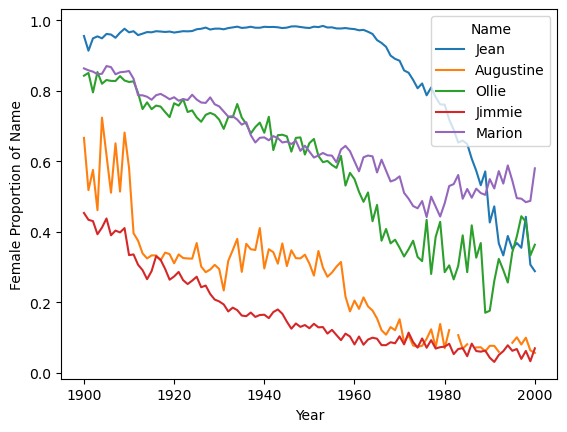

In [146]:
names_ftm.transpose().drop('diff', axis=0).plot.line()
plt.ylabel("Female Proportion of Name")
plt.show()

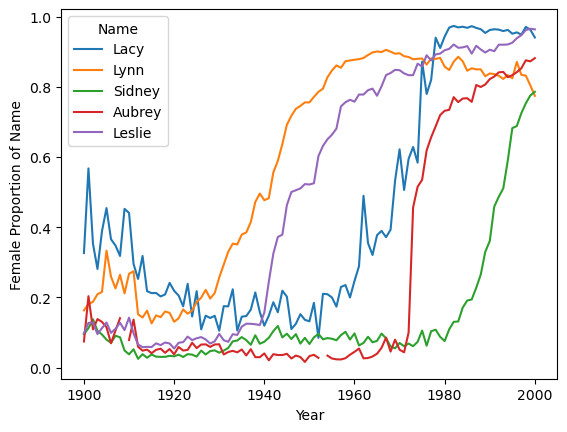

In [147]:
names_mtf.transpose().drop('diff', axis=0).plot.line()
plt.ylabel("Female Proportion of Name")
plt.show()